In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.9.1'

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:\\Users\\ubuntu\\Desktop\\Covid19-dataset\\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

Found 251 images belonging to 3 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:\\Users\\ubuntu\\Desktop\\Covid19-dataset\\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 66 images belonging to 4 classes.


In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))


In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [13]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

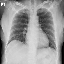

In [16]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img("C:\\Users\\ubuntu\\Desktop\\Covid19-dataset\\test\\Covid\\094.png", target_size = (64, 64))
test_image

In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img("C:\\Users\\ubuntu\\Desktop\\Covid19-dataset\\test\\Covid\\094.png", target_size = (64, 64))


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)


result = cnn.predict(test_image)

result=result.astype(int)
Y=training_set.class_indices
j=0
i = 0
while i < 3:
    
    if result[0][i] == 1:
        break
    i=i+1
print(i)
j=i
if j == 0:
 prediction = 'viral_pnemonia'
    
elif j == 1:
 prediction = 'normal'
elif j == 2:
 prediction = 'covid'


1/1 [==============================] - 0s 12ms/step
2


In [22]:
print(prediction)

covid
